In [1]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import src.mnist

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [5]:
train_set, test_set = src.mnist.get_mnist_full()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
MNIST(N=55000, dataset="train", labels=(55000,), images=(55000, 784), PCA=False, KMeans=False)
Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
MNIST(N=10000, dataset="test", labels=(10000,), images=(10000, 784), PCA=False, KMeans=False)


In [6]:
pca1 = PCA(n_components=100)
pca1.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
train_images_pca1 = pca1.transform(train_set.images)

In [10]:
train_counter = np.bincount(train_set.labels)
train_images_pca1_sorted = []

for i in range(0, 10):
    local_train_images_pca = np.zeros((train_counter[i], 100))
    local_test_images_pca = np.zeros((test_counter[i], 100))
    
    k = 0
    for j in range(0, train_set.images.shape[0]):
        if train_set.labels[j] == i:
            local_train_images_pca[k, :] = train_images_pca1[j]
            k += 1
    
    train_images_pca1_sorted.append(local_train_images_pca)

In [13]:
gaussian_mixtures = []
for i in range(0, 10):
    gaussian_mixture = GaussianMixture(n_components=20, verbose=2)
    gaussian_mixture.fit(train_images_pca1_sorted[i])
    gaussian_mixtures.append(gaussian_mixture)

Initialization 0
  Iteration 0	 time lapse 0.49591s	 ll change inf
  Iteration 10	 time lapse 2.31570s	 ll change 0.00610
  Iteration 20	 time lapse 2.25688s	 ll change 0.00265
Initialization converged: True	 time lapse 6.92533s	 ll 21.01557
Initialization 0
  Iteration 0	 time lapse 0.55298s	 ll change inf
  Iteration 10	 time lapse 2.47701s	 ll change 0.43424
  Iteration 20	 time lapse 2.77552s	 ll change 0.03811
  Iteration 30	 time lapse 2.67362s	 ll change 0.04102
  Iteration 40	 time lapse 2.57764s	 ll change 0.42051
  Iteration 50	 time lapse 2.63473s	 ll change 0.02135
Initialization converged: True	 time lapse 15.51818s	 ll 204.83585
Initialization 0
  Iteration 0	 time lapse 0.58318s	 ll change inf
  Iteration 10	 time lapse 2.67574s	 ll change 0.01277
Initialization converged: True	 time lapse 5.37162s	 ll 0.40120
Initialization 0
  Iteration 0	 time lapse 0.54677s	 ll change inf
  Iteration 10	 time lapse 2.67368s	 ll change 0.11747
  Iteration 20	 time lapse 2.85660s	 ll c

In [47]:
train_scores = []
for i in range(0, 10):
    train_scores.append(gaussian_mixtures[i].score_samples(train_images_pca1))

In [48]:
train_labels_predictions_log_probas = []
for i in range(0, train_images_pca1.shape[0]):
    scores = []
    for j in range(0, 10):
        scores.append(train_scores[j][i])
    predicted_class = scores.index(max(scores))
    train_labels_predictions_log_probas.append([train_set.labels[i], predicted_class, max(scores)])

In [49]:
train_false_positive_scores = []
train_true_positive_scores = []
for label, prediction, log_proba in train_labels_predictions_log_probas:
    if label != prediction:
        train_false_positive_scores.append(log_proba)
    else:
        train_true_positive_scores.append(log_proba)
train_false_positive_scores = sorted(train_false_positive_scores)
train_true_positive_scores = sorted(train_true_positive_scores)

Populating the interactive namespace from numpy and matplotlib


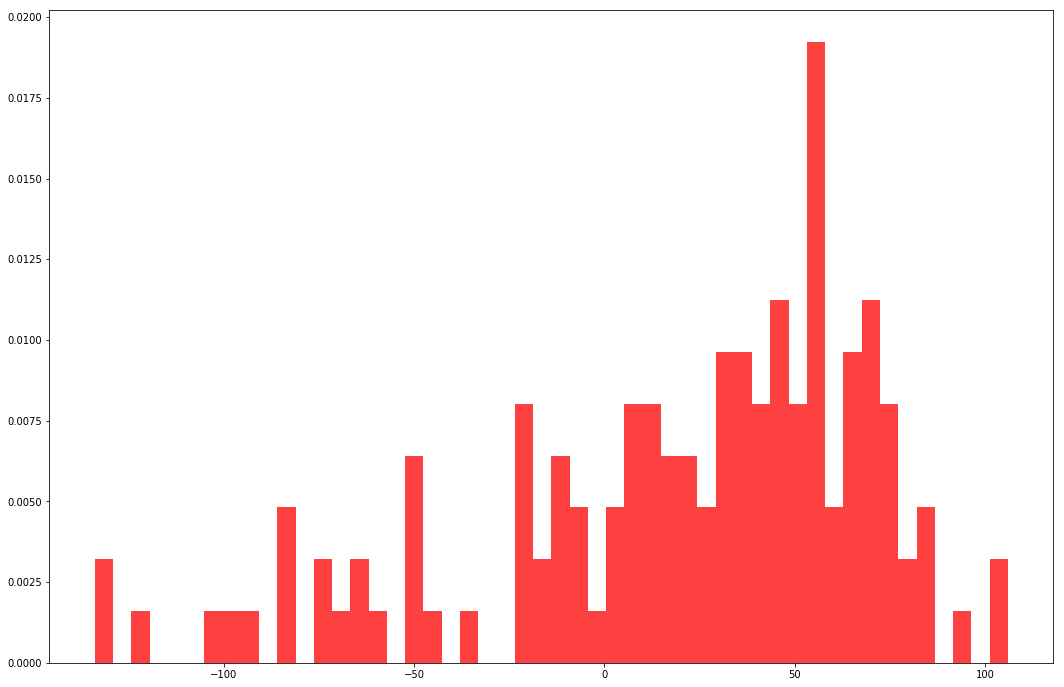

In [65]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)
plt.hist(train_false_positive_scores, 50, normed=1, facecolor='red', alpha=0.75)
plt.show()

Populating the interactive namespace from numpy and matplotlib


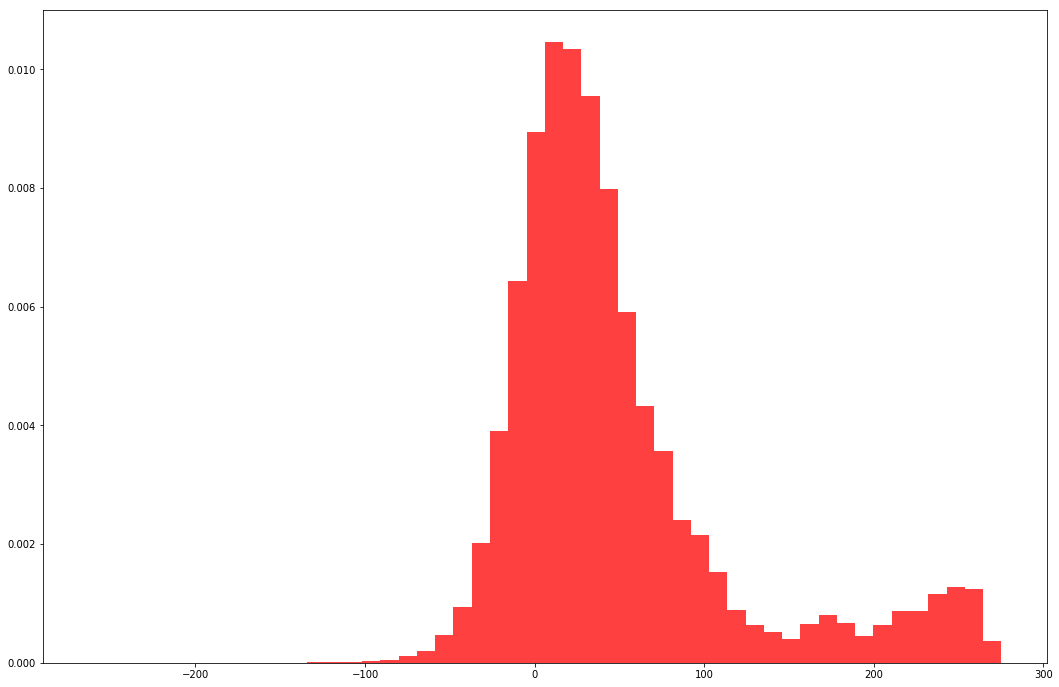

In [64]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)
plt.hist(train_true_positive_scores, 50, normed=1, facecolor='red', alpha=0.75)
plt.show()

Populating the interactive namespace from numpy and matplotlib


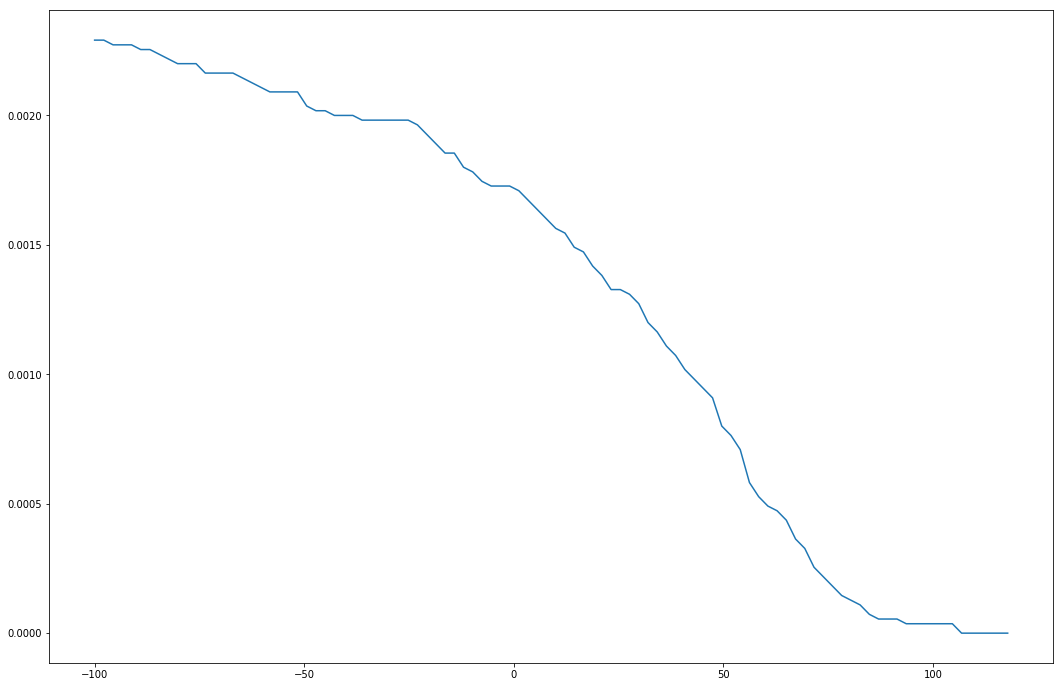

In [82]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)

min_log_proba_threshold = -100.0
max_log_proba_threshold = 120.0
n_tests = 100

X = []
Y = []

for i in range(0, 100):
    test_log_proba_threshold = min_log_proba_threshold + float(i)*(float(max_log_proba_threshold - min_log_proba_threshold)/float(n_tests))
    test_train_false_positive_rate1 = float(sum(1 for score in train_false_positive_scores if score >= test_log_proba_threshold)) / float(train_set.images.shape[0])
    X.append(test_log_proba_threshold)
    Y.append(test_train_false_positive_rate1)
    

plt.plot(X, Y)
plt.show()

Populating the interactive namespace from numpy and matplotlib


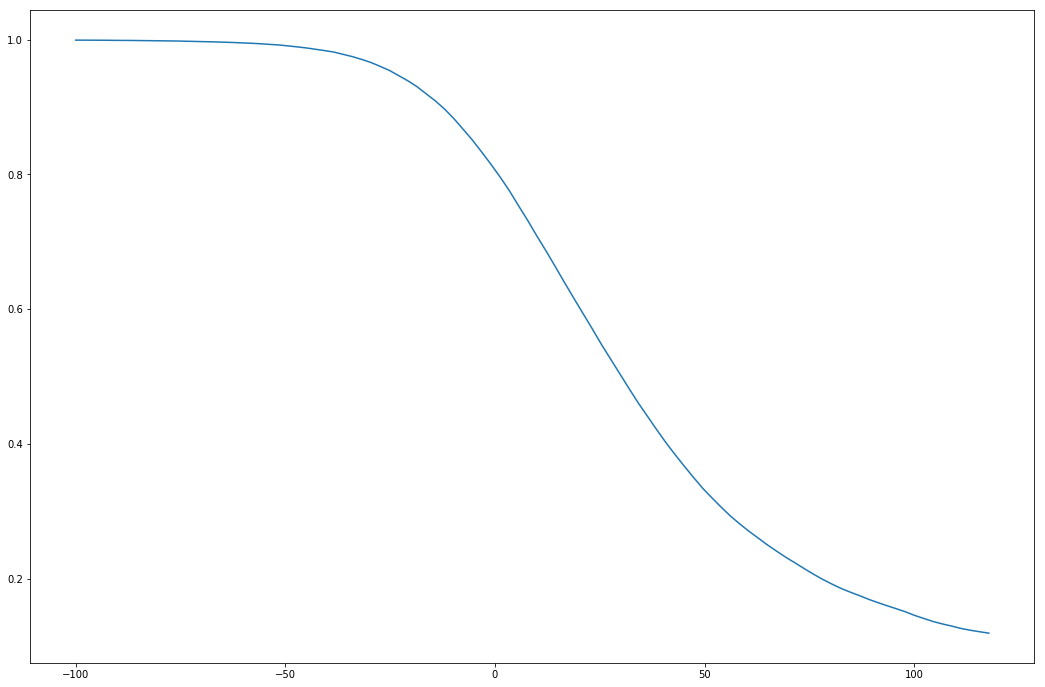

In [83]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)

min_log_proba_threshold = -100.0
max_log_proba_threshold = 120.0
n_tests = 100

X = []
Y = []

for i in range(0, 100):
    test_log_proba_threshold = min_log_proba_threshold + float(i)*(float(max_log_proba_threshold - min_log_proba_threshold)/float(n_tests))
    n_unclassified_train_images1 = sum(1 for label, prediction, log_proba in train_labels_predictions_log_probas if log_proba < test_log_proba_threshold)
    n_classified_train_images1 = train_set.images.shape[0] - n_unclassified_train_images1
    
    n_classified_ratio = float(n_classified_train_images1) / float(n_unclassified_train_images1 + n_classified_train_images1)
    
    X.append(test_log_proba_threshold)
    Y.append(n_classified_ratio)
    

plt.plot(X, Y)
plt.show()

In [104]:
log_proba_threshold = 70.0

In [105]:
train_false_positive_rate1 = float(sum(1 for score in train_false_positive_scores if score >= log_proba_threshold)) / float(train_set.images.shape[0])

In [106]:
print(false_positive_rate1)

0.00032727272727272726


In [107]:
n_unclassified_train_images1 = sum(1 for label, prediction, log_proba in train_labels_predictions_log_probas if log_proba < log_proba_threshold)
n_classified_train_images1 = train_set.images.shape[0] - n_unclassified_train_images1

In [108]:
print(n_unclassified_train_images1)

42376


In [109]:
print(n_classified_train_images1)

12624


In [110]:
unclassified_train_set_images1 = np.zeros((n_unclassified_train_images1, 784))
unclassified_train_set_labels = []

k = 0
for i in range(0, train_set.images.shape[0]):
    if train_labels_predictions_log_probas[i][2] < log_proba_threshold:
        unclassified_train_set_images1[k, :] = train_set.images[i, :]
        unclassified_train_set_labels.append(train_set.labels[i])
        k += 1

In [111]:
pca2 = PCA(n_components=100)
pca2.fit(unclassified_train_set_images1)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [112]:
train_images_pca2 = pca2.transform(unclassified_train_set_images1)

In [161]:
random_forest = RandomForestClassifier(n_estimators=20)
random_forest = random_forest.fit(train_images_pca2, unclassified_train_set_labels)

In [162]:
train_scores = random_forest.predict_proba(train_images_pca2)

In [163]:
train_labels_predictions_probas = []
for i in range(0, train_images_pca2.shape[0]):
    scores = []
    for j in range(0, 10):
        scores.append(train_scores[i][j])
    predicted_class = scores.index(max(scores))
    train_labels_predictions_probas.append([unclassified_train_set_labels[i], predicted_class, max(scores)])

In [164]:
train_false_positive_scores = []
train_true_positive_scores = []
for label, prediction, proba in train_labels_predictions_probas:
    if label != prediction:
        train_false_positive_scores.append(proba)
    else:
        train_true_positive_scores.append(proba)
train_false_positive_scores = sorted(train_false_positive_scores)
train_true_positive_scores = sorted(train_true_positive_scores)

Populating the interactive namespace from numpy and matplotlib


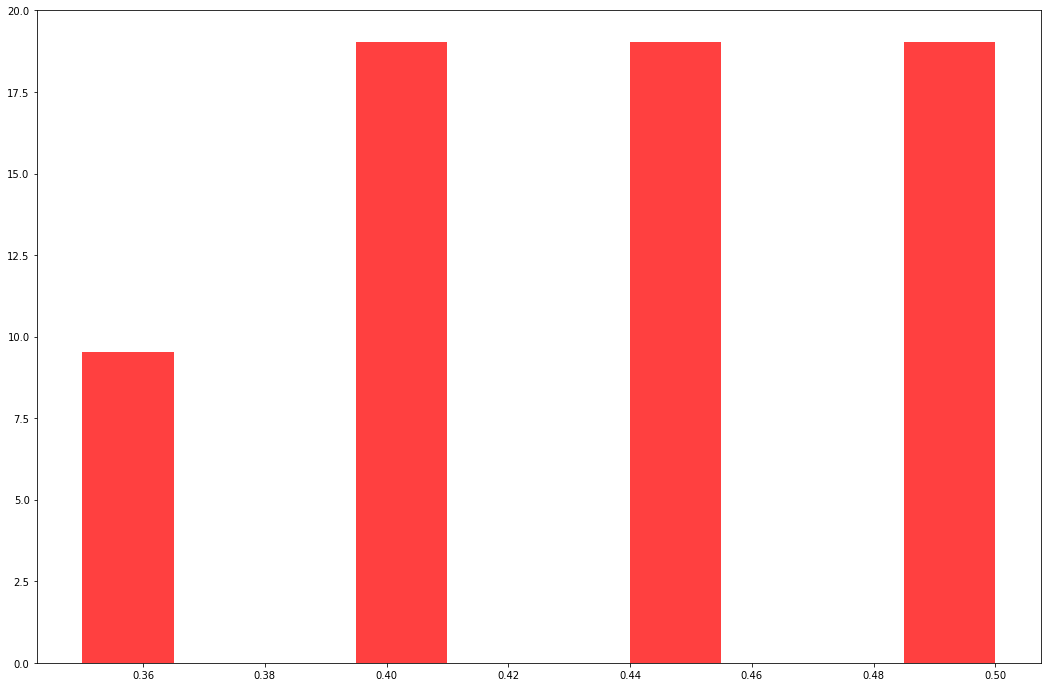

In [165]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)
plt.hist(train_false_positive_scores, 10, normed=1, facecolor='red', alpha=0.75)
plt.show()

Populating the interactive namespace from numpy and matplotlib


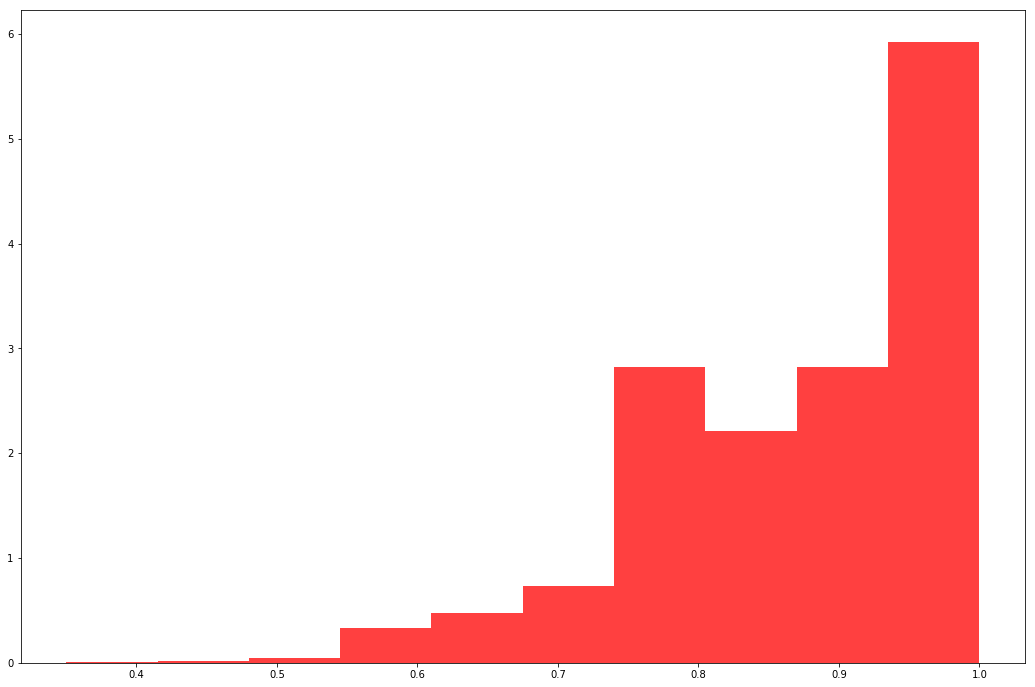

In [167]:
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 12)
plt.hist(train_true_positive_scores, 10, normed=1, facecolor='red', alpha=0.75)
plt.show()